# Simulace rychlosti molekul dusíku podle Maxwell - Boltzmanova rozdělení

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [94]:
N = 10000 #Počet molekul
m_N = 4.65e-26
T_N = 300 #Teplota v Kelvinech
k = 1.38e-23

In [95]:
def velocity(T,m):
    return math.sqrt(3*k*T/m)*3 # Volíme 3x větší, abychom dostávali rychlosti ve větším rozsahu než pouze 0 do střední rychlosti

def Maxwell_Boltzmann(m,T,v):
    return math.sqrt(2/np.pi)*math.sqrt(m_N/(k*T_N))**3*v**2*np.exp(-m*v**2/(2*k*T))

v_1 = np.linspace(0,velocity(T_N,m_N),1000)
f_v = Maxwell_Boltzmann(m_N,T_N,v_1)

vx = np.random.normal(0,math.sqrt(k*T_N/m_N),N)
vy = np.random.normal(0,math.sqrt(k*T_N/m_N),N)
vz = np.random.normal(0,math.sqrt(k*T_N/m_N),N)

v = np.empty(N)

for i in range(N):
    v[i] = math.sqrt(vx[i]**2 + vy[i]**2 + vz[i]**2)

# Výpočet optimálního počtu binů

In [96]:
Ndata=np.size(v)
C=np.empty(Ndata)
delta=np.empty(Ndata)
for i in range(1,Ndata):
    hist,bin_edges=np.histogram(v,bins=i) #vytvoreni histogramu
    mean=np.mean(hist)
    sigma=np.std(hist)
    delta[i]=bin_edges[1]-bin_edges[0]
    C[i]=(2*mean-sigma**2)/delta[i]**2

Cmin=np.min(C)
imin=np.where(C==Cmin)[0]
print('pocet dat:',np.size(v)) 
print('optimalni pocet binu: {0:d}'.format(imin[0]))
print('optimalni sirka binu: {0:f}'.format(delta[imin[0]]))

pocet dat: 10000
optimalni pocet binu: 40
optimalni sirka binu: 31.596107


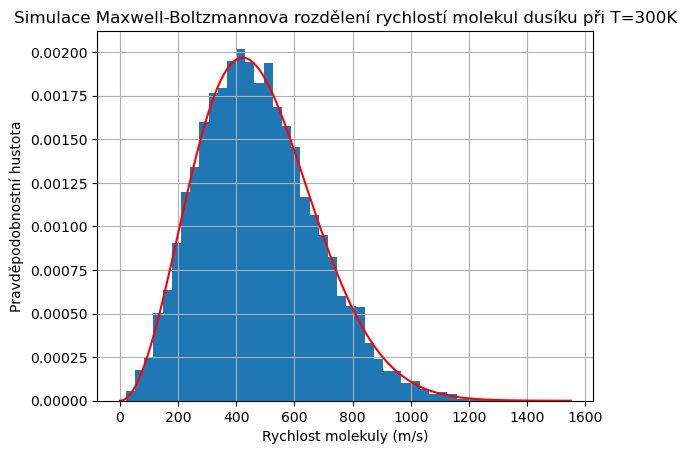

In [97]:
plt.hist(v,bins=imin[0],density=True)
plt.plot(v_1,f_v,color='red')
plt.xlabel("Rychlost molekuly (m/s)")
plt.ylabel("Pravděpodobnostní hustota")
plt.title("Simulace Maxwell-Boltzmannova rozdělení rychlostí molekul dusíku při T=300K")
plt.grid()
plt.show()